### Example code for a knn classification

* Selected dataset [penguins](https://www.openml.org/d/42585) from [OpenML](https://www.openml.org/home)
* For more information about the algorithm see [Nearest Neighbors Classification](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) in the scikit-learn User Guide

#### Reference:  
Example code for a knn classification by ischmahl from the repo [machine-learning-OER-Basics](https://github.com/Machine-Learning-OER-Collection/Machine-Learning-OER-Basics) is licensed under [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).

#### Used libraries in the code:
* [pandas](https://pandas.pydata.org/docs/index.html#) for data analysing
* [scikit-learn](https://scikit-learn.org/stable/index.html) for machine learning
* [seaborn](https://seaborn.pydata.org/) for statistical data visualization
* [matplotlib](https://matplotlib.org/) for data visualization

#### Steps:
1. Preparation of the dataset:
  * Dataset is checked for missing values.
  * Dataset is cleaned and simplified to one unit.
  * Categorical values in the dataset are encoded to numbers.
  * Feature relations are visualized.
2. Training of the data
3. Identifying the optimal value of k.
4. Main metrics

#### First step - Preparation of the dataset

1. Read csv file into the data type DataFrame ([pandas.read_csv documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)).
2. This dataset uses questions marks for missing values. The parameter na_values in the function read_csv converts the question marks in the format NaN (not a number) which can be detected by pandas. 

In [14]:
import pandas as pd
penguins=pd.read_csv("penguins.csv", na_values="?")
#penguins=pd.read_csv("https://www.openml.org/data/get_csv/21854866/penguins.arff", na_values="?")
penguins.dtypes
#penguins.head

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

3. Clean the data by dropping the rows with NaN values.

In [15]:
penguins_NaN=penguins.dropna()
#penguins_NaN.head

3. Drop the columns 'island', 'body_mass_g' and 'sex' to simplify the dataset and to reduce it to one unit the length in millimeter.

In [16]:
penguins_unit = penguins_NaN.drop(['body_mass_g', 'island', 'sex'], axis=1)
penguins_unit.head
penguins_unit.dtypes

species               object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
dtype: object

4. Encode the categorical data in the column 'species' in numerical data by using the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [17]:
from sklearn.preprocessing import LabelEncoder
penguins_unit["species_n"] = LabelEncoder().fit_transform(penguins_unit["species"])
penguins_unit.head
penguins_unit.dtypes

species               object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
species_n              int32
dtype: object

5. Drop the column 'species'.

In [18]:
penguins_encoded = penguins_unit.drop('species', axis=1)
penguins_encoded.head
penguins_encoded.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
species_n              int32
dtype: object

6. Visualize feature relations with a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

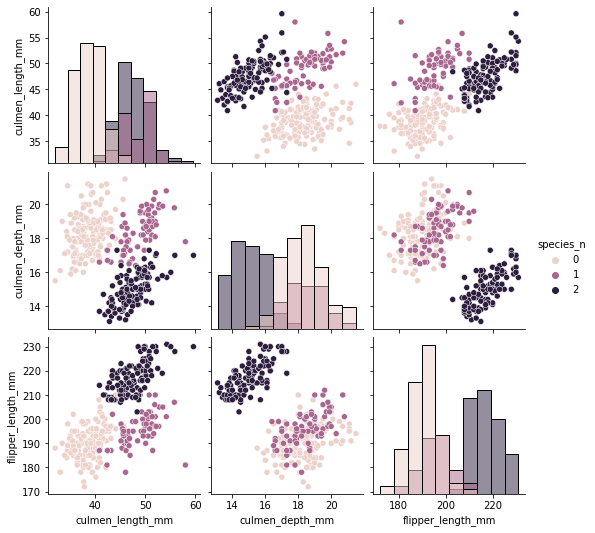

In [19]:
import seaborn as sns
#sns.pairplot(penguins_encoded, diag_kind="hist")
sns.pairplot(penguins_encoded, hue="species_n", diag_kind="hist")

7. Convert to data type numpy array. For more information see the [pandas.DataFrame.values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html).

In [20]:
penguins_processed = penguins_encoded.to_numpy()
type(penguins_processed)

numpy.ndarray

8. Specify the variables target and features.

In [21]:
features = penguins_processed[:,0:]
features.shape

(334, 4)

In [22]:
target = penguins_processed[:,3]
target.shape

(334,)

### Second step - Training of the data

#### Split the data in training and test data.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)

#### Start the knn algorithm and calculate the accuracy for k = 1.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)
knn_clf.predict(X_test)
knn_clf.score(X_test, y_test)

0.9523809523809523

### Third step - Identifying the optimal value of k

In [25]:
neighbors_settings = range(1,20)
accuracy_training = []
accuracy_test = []

In [26]:
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    accuracy_training.append(knn.score(X_train, y_train))
    accuracy_test.append(knn.score(X_test, y_test))

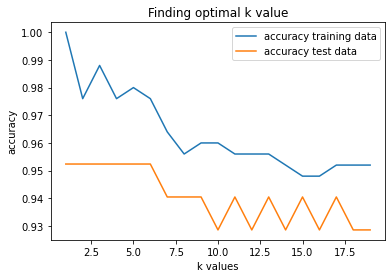

In [27]:
import matplotlib.pyplot as plt
plt.plot(neighbors_settings, accuracy_training, label="accuracy training data")
plt.plot(neighbors_settings, accuracy_test, label="accuracy test data")
plt.title("Finding optimal k value")
plt.ylabel("accuracy")
plt.xlabel("k values")
plt.legend()

#### Result: 
Optimal k value is by 15.

### Fourth step - Main metrics
Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report) to calculate the main metrics

In [28]:
from sklearn.metrics import classification_report
y_pred = knn_clf.predict(X_test)
target_names = ['specie 1', 'specie 2', 'specie 3']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    specie 1       1.00      0.89      0.94        35
    specie 2       0.91      1.00      0.95        21
    specie 3       0.93      1.00      0.97        28

    accuracy                           0.95        84
   macro avg       0.95      0.96      0.95        84
weighted avg       0.96      0.95      0.95        84



Calculate confusion matrix by using [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix).

In [29]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix (y_test, y_pred)
print(confusion)

[[31  2  2]
 [ 0 21  0]
 [ 0  0 28]]
